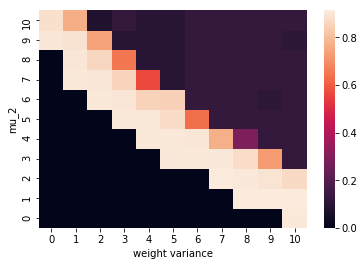

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

results = pd.read_csv("results/results.csv", header=None)
weight_var = results[2]
mu_2 = results[4]
accs = results[7]
im = np.zeros((len(np.unique(weight_var)), len(np.unique(mu_2))))
count = 0
for i in range(len(np.unique(weight_var))):
    for j in range(len(np.unique(mu_2))):
        im[i][j] = accs[count]
        count += 1

ax = sns.heatmap(im.T) #, xticklabels=np.unique(weight_var), yticklabels=np.unique(mu_2))
ax.invert_yaxis()
plt.xlabel("weight variance")
plt.ylabel("mu_2")
plt.show()

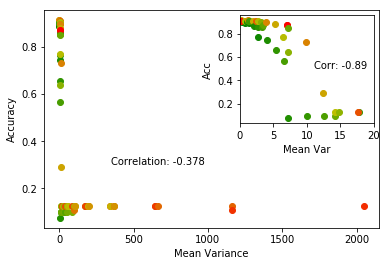

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from colour import Color

var = np.array(results[8])
nan_index = np.where(np.isnan(var))[0]
var = np.delete(var, nan_index)
acc = np.delete(np.array(accs), nan_index)
w = np.delete(np.array(weight_var), nan_index)
mu2 = np.delete(np.array(mu_2), nan_index)
corr = np.corrcoef(var,acc)[0, 1]
prod = 0.5*w*mu2

# set colours
green = Color("green")
colors = list(green.range_to(Color("red"),len(var)))
colors = np.array(colors)[prod.argsort()]

fig, ax = plt.subplots()
inset_axes = inset_axes(ax,
                    width="40%", # width = 30% of parent_bbox
                    height=1.5, # height : 1 inch
                    loc=1)

# plot acc vs var
for v, a, c in zip(var[prod.argsort()], acc[prod.argsort()], colors):
    if str(c) == "#180":
        c = "#158a00"
    ax.plot(v, a, 'ro', c=str(c))
ax.set_xlabel('Mean Variance')
ax.set_ylabel('Accuracy')
ax.text(350, 0.3, 'Correlation: %1.3f' % corr)

corr = np.corrcoef(var[var < 20],acc[var < 20])[0, 1]
for v, a, c in zip(var[prod.argsort()], acc[prod.argsort()], colors):
    if str(c) == "#180":
        c = "#158a00"
    inset_axes.plot(v, a, 'ro', c=str(c))
inset_axes.text(11,0.5, 'Corr: %1.2f' % corr)
inset_axes.set_ylabel('Acc')
inset_axes.set_xlabel('Mean Var')
inset_axes.set_xlim(0,20)
plt.show()

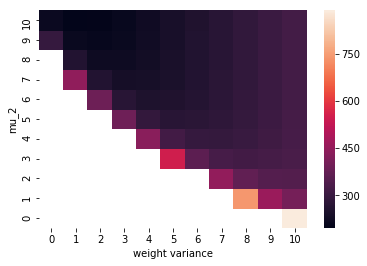

In [4]:
weight_var = results[2]
mu_2 = results[4]
norm = results[9]
im = np.zeros((len(np.unique(weight_var)), len(np.unique(mu_2))))
count = 0
for i in range(len(np.unique(weight_var))):
    for j in range(len(np.unique(mu_2))):
        im[i][j] = norm[count]
        count += 1

ax = sns.heatmap(im.T) #, xticklabels=np.unique(weight_var), yticklabels=np.unique(mu_2))
ax.invert_yaxis()
plt.xlabel("weight variance")
plt.ylabel("mu_2")
plt.show()

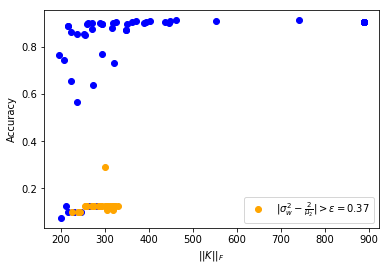

In [5]:
for n, a, m, w in zip(norm, accs, np.array(mu_2), np.array(weight_var)):
    if np.abs(w-2/m) > 0.37:
        plt.plot(n, a, 'ro', c='orange')
    else:
        plt.plot(n, a, 'ro', c='blue')
plt.plot(n, a, 'ro', c='orange', label=r'$|\sigma^2_w - \frac{2}{\mu_2}| > \varepsilon = 0.37$')
plt.xlabel(r'$||K||_F$')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Compute evolution of kernel function for diagonal and off-diagonal elements of K

In [59]:
qs = np.load('corrs.npy', encoding='latin1')

In [68]:
qs[4]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [58]:
np.diag(qs[0])

array([[0.83333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33483973, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.35648942, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.51086432, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.37535987,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.2800355 ]])

In [60]:
qs[0].shape

(1000,)